<a href="https://colab.research.google.com/github/xiborxu/IST462xibo/blob/main/HW4_IST462_Fall2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4  - IST 462 #

Student name: Xibo Xu

In [4]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
# Please make sure that the olympics1992_2008 file has been uploaded to the same folder where you have this
#       notebook file in your google drive and connect your drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
odata = pd.read_csv('/content/HW4_olympics1992_2008.csv',skiprows=4)

In [7]:
# Start exploratory data analysis
odata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9619 entries, 0 to 9618
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          9619 non-null   object
 1   Edition       9619 non-null   int64 
 2   Sport         9619 non-null   object
 3   Discipline    9619 non-null   object
 4   Athlete       9619 non-null   object
 5   NOC           9619 non-null   object
 6   Gender        9619 non-null   object
 7   Event         9619 non-null   object
 8   Event_gender  9619 non-null   object
 9   Medal         9619 non-null   object
dtypes: int64(1), object(9)
memory usage: 751.6+ KB


In [8]:
odata.head(10)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Barcelona,1992,Aquatics,Diving,"XIONG, Ni",CHN,Men,10m platform,M,Bronze
1,Barcelona,1992,Aquatics,Diving,"SUN, Shuwei",CHN,Men,10m platform,M,Gold
2,Barcelona,1992,Aquatics,Diving,"DONIE, Scott R.",USA,Men,10m platform,M,Silver
3,Barcelona,1992,Aquatics,Diving,"CLARK, Mary Ellen",USA,Women,10m platform,W,Bronze
4,Barcelona,1992,Aquatics,Diving,"FU, Mingxia",CHN,Women,10m platform,W,Gold
5,Barcelona,1992,Aquatics,Diving,"MIROCHINA, Elena",EUN,Women,10m platform,W,Silver
6,Barcelona,1992,Aquatics,Diving,"SAUTIN, Dmitry",EUN,Men,3m springboard,M,Bronze
7,Barcelona,1992,Aquatics,Diving,"LENZI, Mark Edward",USA,Men,3m springboard,M,Gold
8,Barcelona,1992,Aquatics,Diving,"TAN, Liang-De",CHN,Men,3m springboard,M,Silver
9,Barcelona,1992,Aquatics,Diving,"BALDUS, Brita Pia",GER,Women,3m springboard,W,Bronze


In [9]:
# Add cells with any additional exploratory data analysis commands/functions that you think are necessary. This will
# not be graded but will help you in solving this homework's tasks
# Hint.. get the unique entries for columns of interest

In [10]:
odata.Athlete.describe() # describe() show the specific info on column

count                9619
unique               7104
top       PHELPS, Michael
freq                   16
Name: Athlete, dtype: object

Solve the following tasks.  You can add as many additional cells as  you need to solve each one of them.

## Task #1 (30 points)

a) List the 5 countries that accumulated the most medals across all the olympic game editions covered in the dataset

b) List the 5 countries that accumulated the most GOLD medals across all the olympic game editions covered in the dataset

In [19]:
most_5_medal = odata.groupby('NOC').size().sort_values(ascending=False).head(5)
# groupby the NOC (country) column and count the number of each country, which will be the medal number
# sort the dataset with descending order, and select the top 5 rows, which will be top 5 countries
print(most_5_medal)

gold = odata[odata['Medal'] == 'Gold'] # from odata, select all rows that Medal column is Gold. Create a new dataset
most_5_gold = gold.groupby('NOC').size().sort_values(ascending=False).head(5)
# groupby the gold dataset by NOC(country), count the number of each country
# sort the dataset with descending order and show the top 5
print(most_5_gold)

NOC
USA    1311
GER     691
AUS     678
RUS     638
CHN     550
dtype: int64
NOC
USA    620
GER    237
CHN    202
RUS    192
AUS    186
dtype: int64


## Task #2 (15 points)

List the number of Gold, Silver and Bronze medals obtained by Women and Men across all the olympic game editions covered in the dataset

In [12]:
odata.groupby(['Gender','Medal']).size()
#groupby odata by "Gender" and "Medal"
# then count the number of each value in Medal (Bronze, Gold, Silver) for men and women

Gender  Medal 
Men     Bronze    1918
        Gold      1807
        Silver    1797
Women   Bronze    1386
        Gold      1357
        Silver    1354
dtype: int64

## Task #3 (15 points)

List the names of the 5 male athletes and 5 female athletes that obtained the most medals across all the olympic game editions covered in the dataset

In [22]:
athlete_gender = odata.groupby(['Gender', 'Athlete']).size().unstack().T
# groupby odata by Gender and Athlete and count the number of row of each athlete, which is the number of medal
# it will come a Series. Use unstack to turn to a Data frame and use T to switch rows and columns

top_women = athlete_gender.Women.sort_values(ascending = False).head(5)
# now find all the women in the dataframe and sort them in descending order, and have the top 5 rows
# this will give me the 5 women athlete with most medals
print(top_women)

top_men = athlete_gender.Men.sort_values(ascending = False).head(5)
# same for male
print(top_men)

Athlete
THOMPSON, Jenny           12.0
COUGHLIN, Natalie         11.0
VAN ALMSICK, Franziska    10.0
TORRES, Dara               9.0
DE BRUIJN, Inge            8.0
Name: Women, dtype: float64
Athlete
PHELPS, Michael     16.0
NEMOV, Alexei       12.0
SCHERBO, Vitaly     10.0
HALL, Gary Jr.      10.0
POPOV, Alexander     9.0
Name: Men, dtype: float64


## Task #4 (40 points)

Provide two additional analysis results that you can derive from the dataset (they must be different than those obtained in tasks 1 to 3). The results can include graphs (but it is not required). Describe the results obtained in the cell provided for that purpose

In [14]:
odata.groupby('Discipline').size().sort_values(ascending=False)
# groupby odata by Discipline and count the number of row of each Discipline
# then sort the dataset by descending order

Discipline
Swimming           920
Athletics          902
Rowing             732
Hockey             481
Football           455
Handball           443
Artistic G.        373
Volleyball         359
Basketball         358
Canoe / Kayak F    345
Baseball           335
Fencing            321
Water polo         311
Judo               280
Sailing            261
Boxing             232
Shooting           231
Cycling Track      229
Weightlifting      194
Softball           180
Wrestling Free.    161
Synchronized S.    135
Wrestling Gre-R    132
Diving             132
Archery            120
Badminton          120
Table Tennis       102
Tennis              94
Rhythmic G.         87
Eventing            81
Taekwondo           80
Canoe / Kayak S     75
Jumping             74
Dressage            72
Cycling Road        65
Beach volley.       48
Modern Pentath.     33
Mountain Bike       24
Trampoline          18
Triathlon           18
BMX                  6
dtype: int64

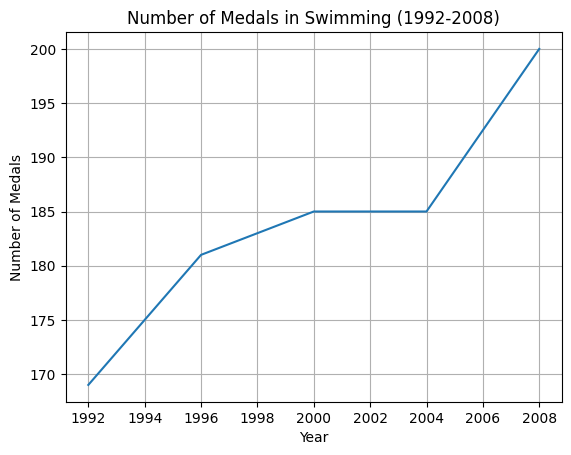

In [15]:
swimming_data = odata[odata['Discipline'] == 'Swimming'] # Select all rows in odata whose Discipline column is swimming and create a new dataset
swimming_medal_by_year = swimming_data.groupby('Edition').size()
# in the new dataset, groupby by Edition, which is the year of Olympic, and count the number of row, and create a new dataset

#visualization part
import matplotlib.pyplot as plt
swimming_medal_by_year.plot(kind='line') #choose the dataset to draw the graph. kind parameter decides which graph I am drawing.
plt.title('Number of Medals in Swimming (1992-2008)')
# add the title to my graph
plt.xlabel('Year')
plt.ylabel('Number of Medals')
# label the x-axies and y-axies
plt.grid(True)
# add grid lines in the graph
plt.show()
# show the graph

**RESULTS DESCRIPTION**


In [16]:
"""The first code uses groupby to group by the dataset by Discipline,
and counts the number of row of each discipline. This code gives the
number of medal for each discipline."""

'The first code uses groupby to group by the dataset by Discipline,\nand counts the number of row of each discipline. This code gives the\nnumber of medal for each discipline.'

In [17]:
"""The second code selects rows whose Discpline column is swimming.
And then group the dataset by the Edition and count the number of rows
of each Edition. This code will give the number of medal for swimming in each
Edition, which is each Olympic game. I save this value into swimming_medal_by_year dataset.

There is also a visualzaition part in my code. I use matplotlib to draw the code:
I select line graph with swimming_medal_by_year dataset, and label the title, x-axies,
y-axies. The graph shows the trends of medal number of swimming over the editions. """

'The second code selects rows whose Discpline column is swimming.\nAnd then group the dataset by the Edition and count the number of rows\nof each Edition. This code will give the number of medal for swimming in each\nEdition, which is each Olympic game. I save this value into swimming_medal_by_year dataset.\n\nThere is also a visualzaition part in my code. I use matplotlib to draw the code:\nI select line graph with swimming_medal_by_year dataset, and label the title, x-axies,\ny-axies. The graph shows the trends of medal number of swimming over the editions. '